In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
%matplotlib inline

In [2]:
data_raw=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_sgd\Interaction_data_sgd_downloads.xlsx',header=17,encoding="utf-8-sig")
col_label=data_raw.columns.values

In [46]:
def query_interactions(query,data=data_raw,col_label=col_label):
    #print(query)
    d2 = defaultdict(dict)
    #query=['CLN1']
    # giant for loop
    names1 = query
    i=-1
    for query1 in names1:
        #filtering the table just for the value of the query
        q1 = data[data['Standard_Gene_Name_(Bait)']==query1]
        #r=get_row(query1)
        #df1 = pd.DataFrame(q1, columns=["excel_number", "Interactors of query1"])
        #gb1 = df1.groupby("Interactors of query1", sort=False) # the grouping reorganizes the set alphatically, the sort by default is true!!!!!!
        #gb1_row = df1.groupby("excel_number",sort=False)
        q1_interact=q1[col_label[3]].unique()
        
       # a for loop for all the interactors of query
        if len(q1_interact)==0: 
            d2[query1, 'None']["% of query subset"] = 0
            
        for query2 in q1_interact:

            #i+=1
            # write in a matrix , where the 1st column are the names in q1 and the first row = q1[0]+get_query(q1[0]) 
            q2=data[data['Standard_Gene_Name_(Bait)']==query2] #these are get_query(q1[i])

            q2_interact=q2[col_label[3]].unique()
            # how to avoid that df2 overlaps with the next value? 
            #df2 = pd.DataFrame(q2, columns=["excel raw number of q2", "Interactors of query2"])
            #gb2 = df2.groupby("Interactors of query2",sort=False)

            #names3 = [name3 for name3, row2 in gb2] # to visualize what is in the interactors for query 2


            d = defaultdict(int)
            common = []

            for name1  in q2_interact:
                if name1 in q1_interact: # if a gene interactor of the query1 is in interactors of query 2 
                    common.append(name1)
                    d[name1] += 1


            d2[query1, query2]["common"] = common
            d2[query1,query2]["names of genes"]=query2
            d2[query1, query2]["n_common"] = len(common)
            d2[query1, query2]["query gene info length"] = len(q1_interact)
            d2[query1, query2]["interactors of query gene info length"] = len(q2_interact)
            
            
            if len(q1)==0 :
                d2[query1, query2]["% of query subset"] = 0
            else:
                d2[query1, query2]["% of query subset"] = len(d)/len(q1_interact) *100

            if len(q2)==0 or len(q1_interact)==0:
                d2[query1, query2]["% of query 2 subset  "] = 0
            else:
                d2[query1, query2]["% of query 2 subset  "] = len(d)/len(q2_interact) *100

            q1_filt=q1[q1[col_label[3]]==query2]


    #        if q1_filt[col_label[4]].any()=='Synthetic Lethality ': 
            interactions_lethality=(q1_filt[col_label[4]]=='Synthetic Lethality')
            interactions_negative=(q1_filt[col_label[4]]=='Negative Genetic')
            interactions_positive=(q1_filt[col_label[4]]=='Positive Genetic')
            
            d2[query1,query2]["Type"]= 'not clear interaction'

            if interactions_lethality.any()==True: 

                d2[query1,query2]["Type"]= 'Synthetic Lethality'
            #else:
           # if interactions_lethality.all()==False and interactions_negative.any()==False and interactions_positive.any()==False:
                #d2[query1,query2]["Type"]='Not clear'
            if interactions_negative.all()==True: 
                d2[query1,query2]["Type"]= 'Negative'
            #else:
           # if interactions_lethality.all()==False and interactions_negative.any()==False and interactions_positive.any()==False:
                #d2[query1,query2]["Type"]='Not clear'
            if interactions_positive.all()==True: 
                d2[query1,query2]["Type"]= 'Positive'   
            #else:
           # if interactions_lethality.all()==False and interactions_negative.any()==False and interactions_positive.any()==False:
                #d2[query1,query2]["Type"]='Not clear'
           # else: 
            d2[query1,query2]["interact_annotation"]=q1_filt[col_label[4]]
            
       

        df=pd.DataFrame(d2).T
        df_sorted=df.sort_values(by=["% of query subset"])
        df_sorted=df_sorted[::-1]
        df_sorted.to_excel("..\output-excel-files-postprocessed-data\data_output_"+ "-".join(query) + ".xlsx")
        data_output=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\output-excel-files-postprocessed-data\data_output_'+ "".join(query) + ".xlsx")
    return data_output

In [25]:

genes_passed_test=[['NRP1'],['BEM3'],['GPR1'],['ACT1'],['BRE5'],['CDC28'],['HSP82'],['CDC3'],['ADE13'],['SEC14'],['ARP2'],['BIM1'],
              ['BEM4'], ['BUB3'],['CNB1'],['GIM3'],['LTE1'],['MAD1'],['PHO85'],['SEC15'],['SEC3'],['SMI1'],['SMY1'],['SWI4'],
              ['BEM2'],['BEM1'], ['CDC24'],['CDC42'],['RDI1'],['CLA4'],['RSR1'],['RGA1'],['BNI1'],['GIC2'],['BNR1'],
              ['MYO1'],['MSB3'],['EXO70'],['CLN1'],['CLN2'],['IRA2'],['WHI2'],['WHI3']]





In [44]:
genes_all=[]
all_names=data_raw['Standard_Gene_Name_(Bait)'].unique()
all_names=all_names[~pd.isnull(all_names)]

for genes in all_names:

    genes_all.append([genes])
    
    
del genes_all[3993] # genes_all[3993]=[datetime.datetime(2005, 5, 1, 0, 0)]
print(genes_all)

[['RCL1'], ['PWP1'], ['NOP12'], ['RLP7'], ['CWC2'], ['DRN1'], ['LSR1'], ['DBR1'], ['PUF3'], ['PRP24'], ['NRD1'], ['NAB3'], ['POP5'], ['NME1'], ['POP7'], ['POP4'], ['POP6'], ['POP1'], ['CLB2'], ['15S_RRNA'], ['DHH1'], ['COX1'], ['COX2'], ['COR1'], ['COX20'], ['OXA1'], ['COX4'], ['COX13'], ['TIM21'], ['SHY1'], ['PET54'], ['COX6'], ['COA1'], ['COA3'], ['BAT2'], ['MIC60'], ['MSS51'], ['COX8'], ['RCF1'], ['COX14'], ['TIM23'], ['RCF2'], ['MDM38'], ['COA2'], ['QCR2'], ['HHF1'], ['MAG1'], ['NAB2'], ['HHF2'], ['TAZ1'], ['MMS22'], ['ATP6'], ['ATP8'], ['ATP1'], ['ATP2'], ['ATP7'], ['ATP10'], ['ARE2'], ['ATP4'], ['BCS1'], ['COB'], ['PET9'], ['QCR7'], ['CBP4'], ['CBP2'], ['CBP3'], ['ACB1'], ['BI2'], ['MRS1'], ['BI4'], ['NAM2'], ['OLI1'], ['SSC1'], ['CMR1'], ['MRP4'], ['CCT3'], ['RSM22'], ['CUZ1'], ['VAR1'], ['YLH47'], ['MRH4'], ['SCEI'], ['SCO1'], ['MSS2'], ['COX18'], ['PHB1'], ['MMF1'], ['COA6'], ['PET111'], ['BXI1'], ['CYT1'], ['COX3'], ['COX7'], ['PET494'], ['RRP7'], ['SUP35'], ['RPS26A'], ['EMG

In [52]:
result=np.where(all_names==['HMLALPHA1'])
result
genes_all[3736]

['HMLALPHA1']

## Function that computes the common genes for all of the genes established above

In [59]:
data_test=[]
#genes_passed=data_raw['Standard_Gene_Name_(Bait)'][0:10].unique()

for names in genes_all[0:300]:
    output_excel=query_interactions(names)
    data_test.append(output_excel)
    
   




In [53]:
## Functions

def positive_int(data):
    return data[data['Type']=='Positive']['% of query subset'] 
def positive_query2(data):
    return data[data['Type']=='Positive']['% of query 2 subset  ']
def negative_int(data):
    return data[data['Type']=='Negative']['% of query subset']
def negative_query2(data):
    return data[data['Type']=='Negative']['% of query 2 subset  ']
def lethal_int(data):
    return data[data['Type']=='Synthetic Lethality']['% of query subset']
def lethal_query2(data):
    return data[data['Type']=='Synthetic Lethality']['% of query 2 subset  ']


In [60]:
data=data_test

In [61]:
## Positive Interactions
data_positive=[]
data_positive_query2=[]
for names in data:
    data_positive.append(positive_int(names))
    data_positive_query2.append(positive_query2(names))

## Negative Interactions
data_negative=[]
data_negative_query2=[]

for names in data:
    data_negative.append(negative_int(names))
    data_negative_query2.append(negative_query2(names))

## Synthetic Lethal interactions
data_lethality=[]
data_lethality_query2=[]

for names in data:
    data_lethality.append(lethal_int(names))
    data_lethality_query2.append(lethal_query2(names))

In [62]:
len(data)

300

In [63]:
## Average
mean_values_positive=[]
mean_values_positive_query2=[]
std_values_positive=[]
std_values_positive_query2=[]

mean_values_negative=[]
std_values_negative=[]
mean_values_negative_query2=[]
std_values_negative_query2=[]

mean_values_lethal=[]
std_values_lethal=[]
mean_values_lethal_query2=[]
std_values_lethal_query2=[]

for i in range(0,len(data)):
    mean_values_positive.append(np.mean(data_positive[i]))
    mean_values_positive_query2.append(np.mean(data_positive_query2[i]))
    std_values_positive.append(np.std(data_positive[i]))
    std_values_positive_query2.append(np.std(data_positive_query2[i]))

    mean_values_negative.append(np.mean(data_negative[i]))
    std_values_negative.append(np.std(data_negative[i]))
    mean_values_negative_query2.append(np.mean(data_negative_query2[i]))
    std_values_negative_query2.append(np.std(data_negative_query2[i]))
    
    mean_values_lethal.append(np.mean(data_lethality[i]))
    std_values_lethal.append(np.std(data_lethality[i]))
    mean_values_lethal_query2.append(np.mean(data_lethality_query2[i]))
    std_values_lethal_query2.append(np.std(data_lethality_query2[i]))
    
mean_values=[mean_values_positive,mean_values_negative,mean_values_lethal]
mean_values_query2=[mean_values_positive_query2,mean_values_negative_query2,mean_values_lethal_query2]

std_values=[std_values_positive,std_values_negative,std_values_lethal]
std_values_query2=[std_values_positive_query2,std_values_negative_query2,std_values_lethal_query2]

C:\Users\linigodelacruz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


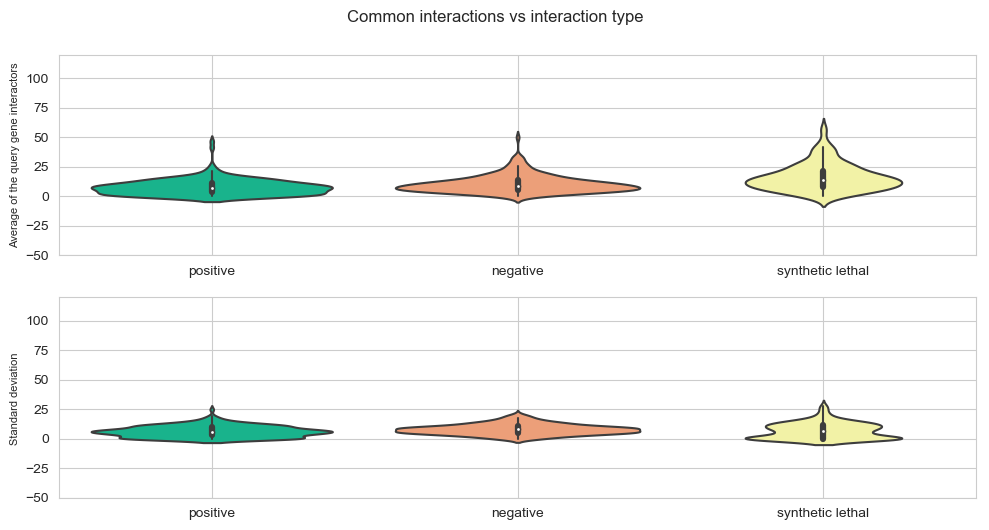

In [69]:
## Violin plot for the averages and std for each gene positive, negative and synthetic lethal interactions
## Data quality

# Make a dictionary with one specific color per group:
my_pal = {"#ff9966",  '#ffff99', '#00cc99'}

fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.2, right=0.5, top=1.4)
fig.suptitle('Common interactions vs interaction type',x=0.5,y=1.05)

plt.subplot(2,1, 1)
sns.violinplot(data=mean_values,scale="count",palette = my_pal)

plt.xticks(np.arange(0,3),['positive','negative','synthetic lethal'])
plt.ylabel('Average of the query gene interactors',{'fontname':'Arial', 'size':'8'})
plt.grid(True)
plt.ylim(-50,120)

plt.subplot(2,1,2)
#sns.stripplot(data=mean_values,palette = my_pal)
# sns.violinplot(data=mean_values_query2,scale="count",palette = my_pal)
# plt.xticks(np.arange(0,3),['positive','negative','synthetic lethal'])
# plt.grid(True)
# plt.ylim(-50,120)
# plt.ylabel('Average of 2nd pair gene interactors',{'fontname':'Arial', 'size':'8'})

#plt.subplot(2,2, 3)
sns.violinplot(data=std_values,scale="count",palette = my_pal)

plt.xticks(np.arange(0,3),['positive','negative','synthetic lethal'])
plt.ylabel('Standard deviation ',{'fontname':'Arial', 'size':'8'})
plt.grid(True)
plt.ylim(-50,120)

# plt.subplot(2,2,4)
# #sns.stripplot(data=std_values,palette = my_pal)
# sns.violinplot(data=std_values_query2,scale="count",palette = my_pal)
# plt.xticks(np.arange(0,3),['positive','negative','synthetic lethal'])
# plt.grid(True)
# plt.ylim(-50,120)
# plt.ylabel('Std of 2nd pair gene interactors',{'fontname':'Arial', 'size':'8'})

plt.tight_layout()
plt.savefig("C:\\Users\\linigodelacruz\\Documents\\PhD_2018\\Documentation\\Calculations\\Functions\\output-figures-python-reproducibility-scripts\\300-genes-violinplot-average-std-common-interactors-vs-interaction-type.svg",dpi=300,format='svg')
plt.savefig("C:\\Users\\linigodelacruz\\Documents\\PhD_2018\\Documentation\\Calculations\\Functions\\output-figures-python-reproducibility-scripts\\300-genes-violinplot-average-std-common-interactors-vs-interaction-type.png",dpi=300,format='png')

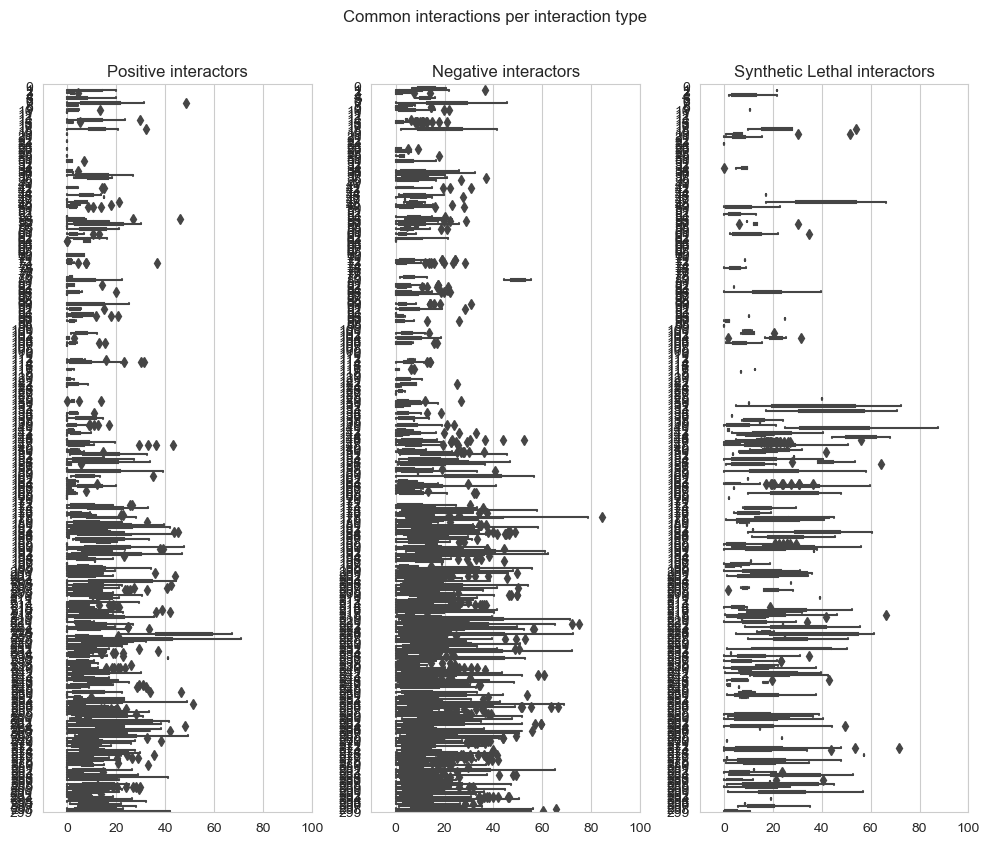

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10,8), dpi=100, sharex=True, sharey=True)
fig.suptitle('Common interactions per interaction type',x=0.5,y=1.05)
plt.subplot(1,3, 1)
plt.title('Positive interactors')
plt.grid(True)
plt.ylabel('')
plt.xlim(-10,100)
ax = sns.boxplot(data=data_positive,orient="h")
sns.set_style("whitegrid")

plt.subplot(1,3, 2)
plt.title('Negative interactors')
plt.grid(True)
plt.xlim(-10,100)
ax1 = sns.boxplot(data=data_negative,orient="h")
sns.set_style("whitegrid")


plt.subplot(1,3,3)
plt.title('Synthetic Lethal interactors')
plt.grid(True)
plt.xlim(-10,100)
ax2 = sns.boxplot(data=data_lethality,orient="h")
sns.set_style("whitegrid")


plt.subplots_adjust(bottom=0.5, right=1.4, top=1.4)


plt.tight_layout()
plt.savefig("C:\\Users\\linigodelacruz\\Documents\\PhD_2018\\Documentation\\Calculations\\Functions\\output-figures-python-reproducibility-scripts\\300-genes-boxplot-common-interactors-vs-interaction-type.svg",dpi=300,format='svg')
plt.savefig("C:\\Users\\linigodelacruz\\Documents\\PhD_2018\\Documentation\\Calculations\\Functions\\output-figures-python-reproducibility-scripts\\300-genes-boxplot-common-interactors-vs-interaction-type.png",dpi=300,format='png')

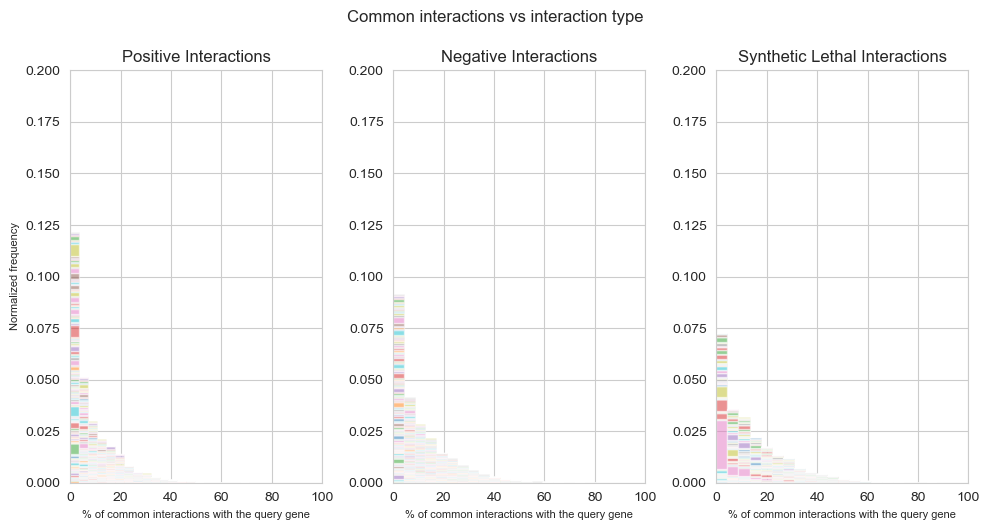

In [71]:
## Plots histogram

fig, axes = plt.subplots(1, 3, figsize=(10,5), dpi=100, sharex=True, sharey=True)
fig.suptitle('Common interactions vs interaction type',x=0.5,y=1.05)
kwargs_positive = dict(alpha=0.5, bins=20, density=True, stacked=True)
kwargs_negative = dict(alpha=0.5, bins=20, density=True, stacked=True)
kwargs_lethal = dict(alpha=0.5, bins=20, density=True, stacked=True)

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'8'}

## Positive Interactions
plt.subplots_adjust(bottom=0.5, right=1.4, top=1.4)
#fig.suptitle('This is a somewhat long figure title', fontsize=16)

plt.subplot(1,3, 1)
plt.grid(True)
plt.ylabel('Normalized frequency',**axis_font)
plt.xlabel('% of common interactions with the query gene',**axis_font)
plt.xlim(0,100)
plt.ylim(0,0.2)
plt.hist(data_positive[1:len(data_positive)],**kwargs_positive,label=['Positive Interactions'],cumulative=False) 
plt.title('Positive Interactions')

plt.subplot(1,3, 2)
plt.grid(True)
#plt.ylabel('Normalized frequency',**axis_font)
plt.xlim(0,100)
plt.ylim(0,0.2)
plt.xlabel('% of common interactions with the query gene',**axis_font)
plt.hist(data_negative[1:len(data_negative)],**kwargs_negative,label=['Negative Interactions'],cumulative=False) 
plt.title('Negative Interactions')

plt.subplot(1,3, 3)
plt.grid(True)
#plt.ylabel('Normalized frequency',**axis_font)
plt.xlim(0,100)
plt.ylim(0,0.2)
plt.xlabel('% of common interactions with the query gene',**axis_font)
plt.hist(data_lethality[1:len(data_lethality)],**kwargs_lethal,label=['Lethality Interactions'],cumulative=False) 
plt.title('Synthetic Lethal Interactions')

plt.tight_layout()
#plt.savefig("output-figures-python-reproducibility-scripts\common-interactors-vs-interaction-type.tiff",dpi=300,format='tiff')

C:\Users\linigodelacruz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


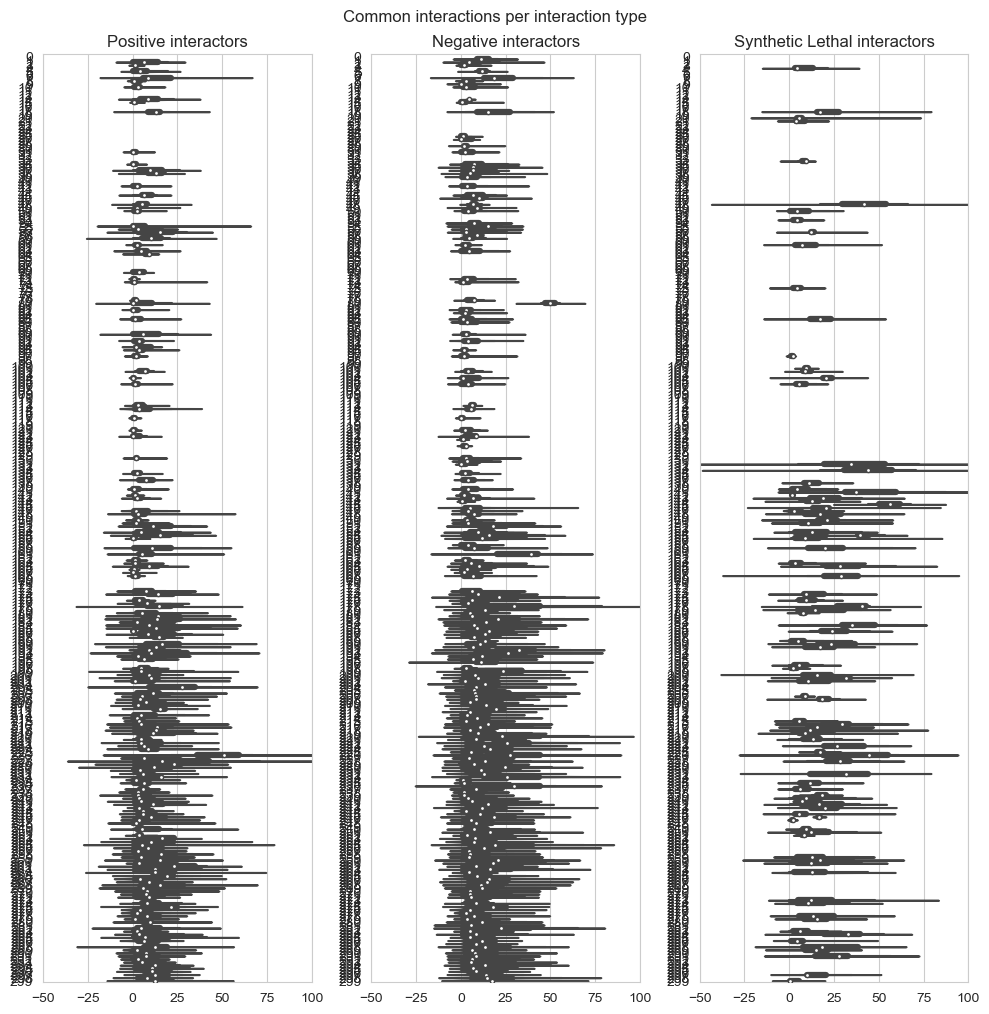

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(10,10), dpi=100, sharex=True, sharey=True)
fig.suptitle('Common interactions per interaction type',x=0.5,y=1.01)
plt.subplot(1,3, 1)
plt.title('Positive interactors')
plt.grid(True)
plt.ylabel('')
plt.xlim(-50,100)
ax = sns.violinplot(data=data_positive,scale="count",orient='h')
sns.set_style("whitegrid")

plt.subplot(1,3, 2)
plt.title('Negative interactors')
plt.grid(True)
plt.xlim(-50,100)
ax1 = sns.violinplot(data=data_negative,scale="count",orient='h')
sns.set_style("whitegrid")

plt.subplot(1,3,3)
plt.title('Synthetic Lethal interactors')
plt.grid(True)
plt.xlim(-50,100)
ax2 = sns.violinplot(data=data_lethality,scale="count",orient='h')
sns.set_style("whitegrid")


plt.subplots_adjust(bottom=0.5, right=1.4, top=1.4)


plt.tight_layout()
#plt.savefig("output-figures-python-reproducibility-scripts\violinplot-common-interactors-vs-interaction-type.tiff",dpi=300,format='tiff')